In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

      Time  Temperature  Humidity  Pressure
0     2016          3.8      95.0    1028.3
1     2016          4.3      92.0    1016.0
2     2016          4.7      92.0    1009.1
3     2016          4.6      89.0     995.9
4     2016          5.1      89.0     998.4
...    ...          ...       ...       ...
1822  2020          1.1      72.0    1000.7
1823  2020          4.4      79.0     982.2
1824  2020          3.5      81.0     991.8
1825  2020          3.4      80.0    1004.8
1826  2020          2.4      81.0    1006.5

[1827 rows x 4 columns]


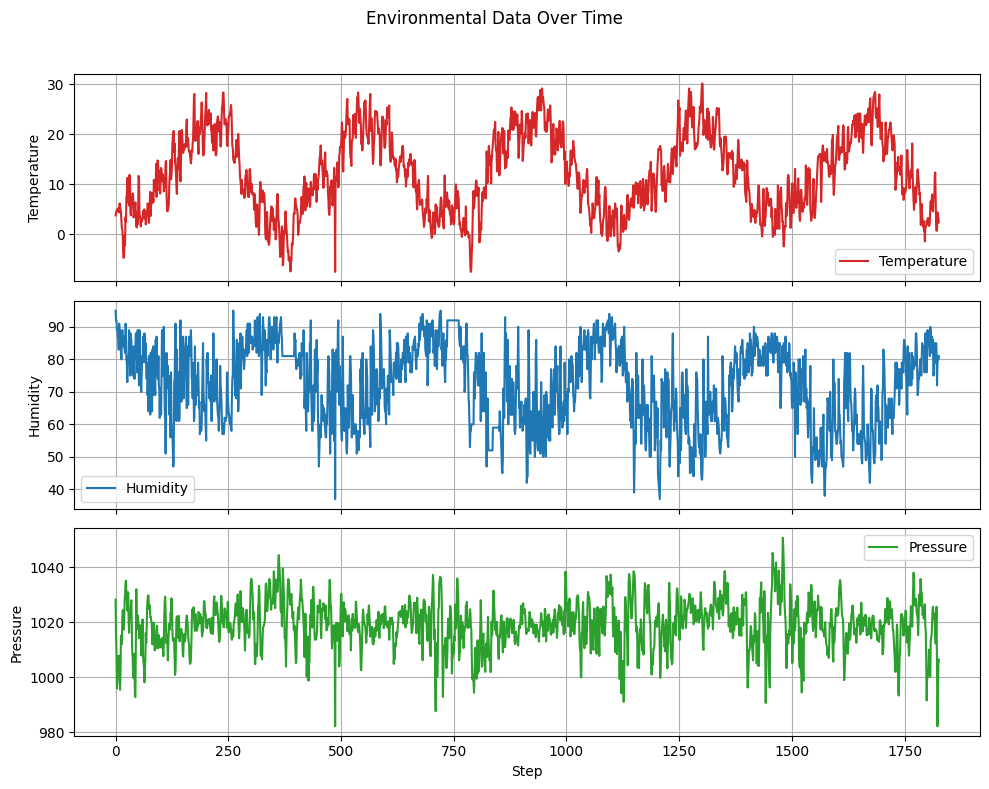

In [6]:
data = pd.read_csv("dailyweather.csv")
print(data)

temp = data["Temperature"]
hum = data["Humidity"]
pres = data["Pressure"]
step = range(len(temp))

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(step, temp, label="Temperature", color='tab:red')
axs[0].set_ylabel("Temperature")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(step, hum, label="Humidity", color='tab:blue')
axs[1].set_ylabel("Humidity")
axs[1].legend()
axs[1].grid(True)

axs[2].plot(step, pres, label="Pressure", color='tab:green')
axs[2].set_ylabel("Pressure")
axs[2].set_xlabel("Step")
axs[2].legend()
axs[2].grid(True)

plt.suptitle("Environmental Data Over Time")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


We think that Humidity and Temperature are heavily negative correlated, since they have opposite maxima/minima at the same time (day) with the same period (due to seasons)
The pressure also seems to be correlated with the other quantitites, since it also shows periodic behaviour over the seasons, but not so heavily.

In [8]:
correlations = data[['Temperature', 'Humidity', 'Pressure']].corr()
print(correlations)

             Temperature  Humidity  Pressure
Temperature     1.000000 -0.603413 -0.016089
Humidity       -0.603413  1.000000 -0.072740
Pressure       -0.016089 -0.072740  1.000000


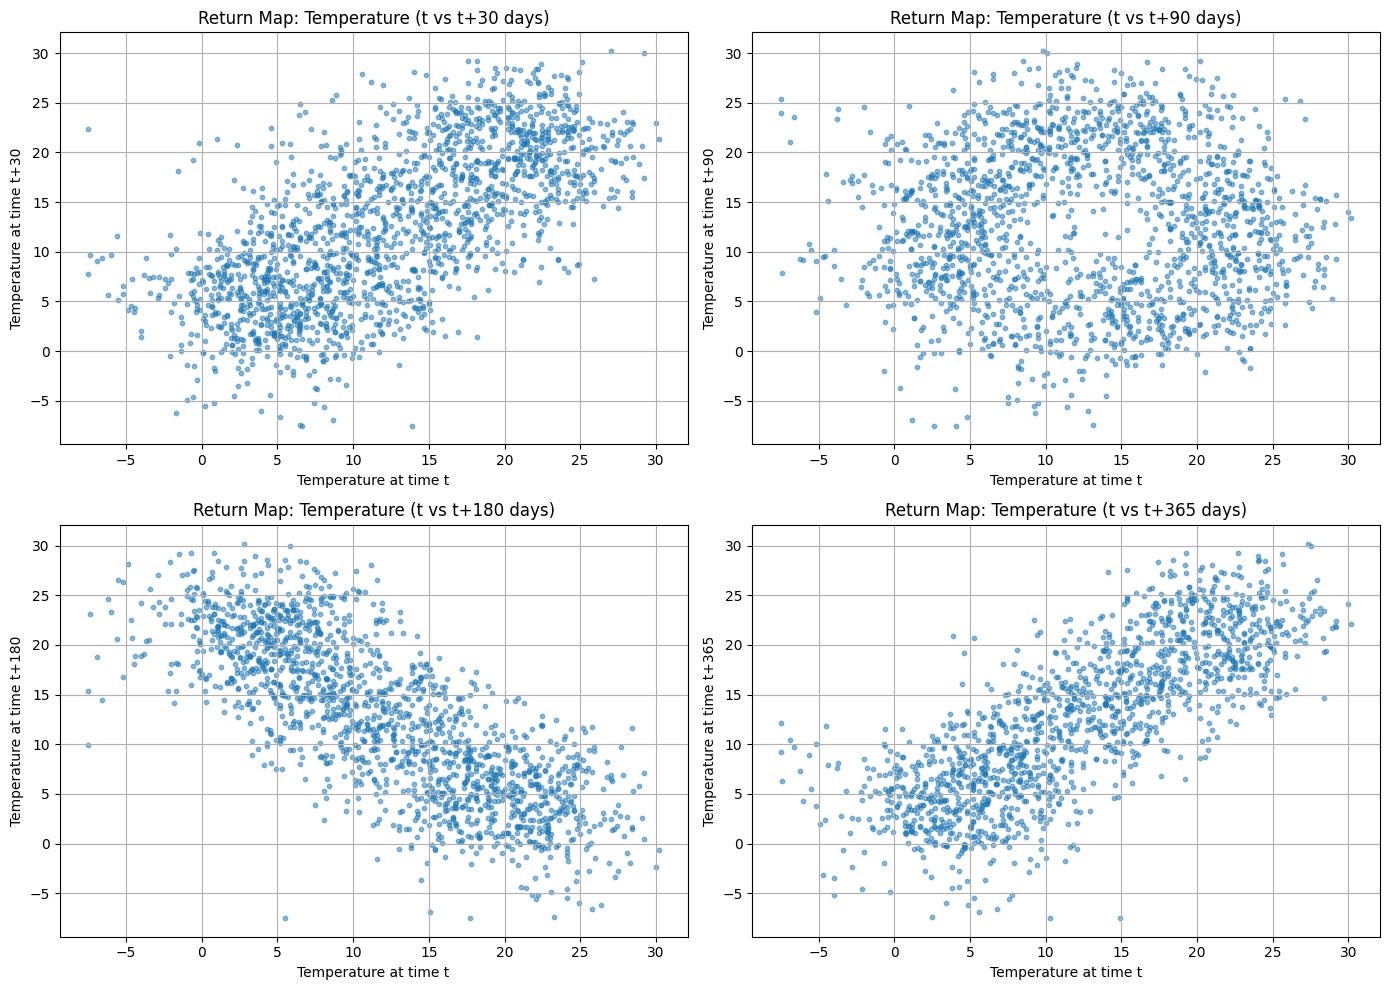

In [10]:
lags = [30, 90, 180, 365]

# Plot return maps
plt.figure(figsize=(14, 10))
for i, lag in enumerate(lags, 1):
    plt.subplot(2, 2, i)
    plt.scatter(temp[:-lag], temp[lag:], alpha=0.5, s=10)
    plt.title(f"Return Map: Temperature (t vs t+{lag} days)")
    plt.xlabel("Temperature at time t")
    plt.ylabel(f"Temperature at time t+{lag}")
    plt.grid(True)

plt.tight_layout()
plt.show()

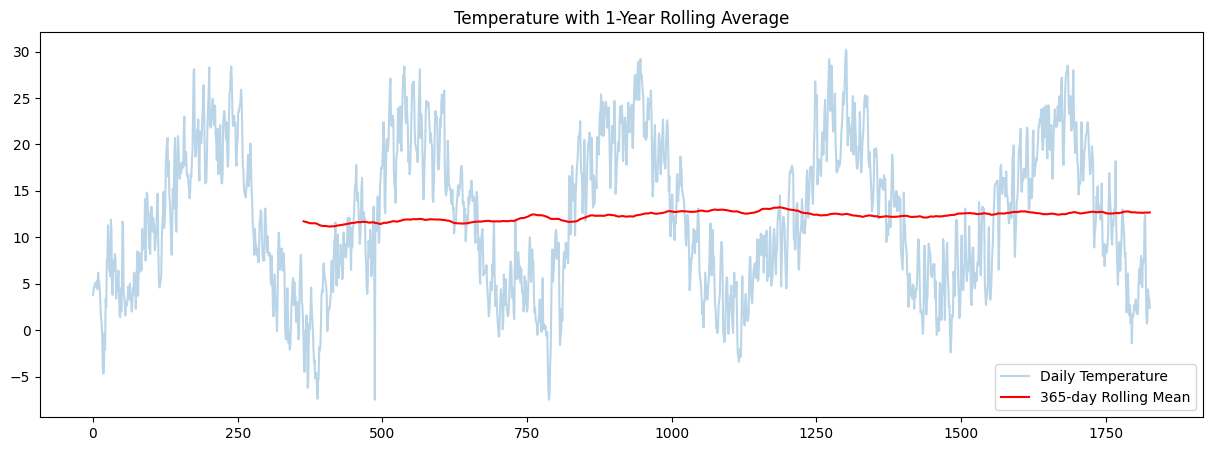

In [12]:
data['temp_rolling'] = data['Temperature'].rolling(window=365).mean()

plt.figure(figsize=(15, 5))
plt.plot(data['Temperature'], alpha=0.3, label='Daily Temperature')
plt.plot(data['temp_rolling'], color='red', label='365-day Rolling Mean')
plt.title("Temperature with 1-Year Rolling Average")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert index into numerical values
X = np.arange(len(data)).reshape(-1, 1)
y = data['Temperature'].values

# Fit regression
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.figure(figsize=(15, 5))
plt.plot(data['Temperature'], alpha=0.3, label='Temperature')
plt.plot(trend, color='red', label='Linear Trend')
plt.title("Temperature Trend via Linear Regression")
plt.legend()
plt.show()

# Print the slope
print(f"Trend slope (°C/day): {model.coef_[0]:.6f}")
